# Project 2
### In this notebook, we will import reviews from csv files and analyze correlation between sentiment and ratings
COMM 155 - Artificial Intelligence and New Media, Winter 2021, Prof. J. Joo, TA - Aakash Srinivasan

**Due date: Monday, March 1, 2021 11:59 pm** via CCLE. Late submission will not be accepted.

Data: [drive link](https://drive.google.com/drive/folders/12-qr7btdrbceh4Km_4-xBBjmeoB8m1hF?usp=sharing)

**Download three csv files - *amazon.csv*, *beer.csv*, *movie.csv* from the link above. Create a new folder named `COMM155_Project_2_Data` in your `My Drive` and upload the three csv files to this folder. You are required to programatically access the files from here for this project.**

You only need to code between the commented sections. Any code outside of it is for formatting purposes and should not be modified.

1. Your code will be graded on correctness, not on efficiency.
2. Feel free to use the search engine or other resources for debugging or learning correct syntax etc. But do not completely copy-paste code from outside.
3. You must comment your code wherever necessary.
4. **In this project notebook, there are a few questions asked based on the results and plots obtained and you are required to type out answers in the assigned text blocks. You won't be required to submit a separate report. All the answers should be self-contained in this notebook.**
5. You may find [Python Tutorial Notebook 2](https://colab.research.google.com/drive/1h9p_u-REFjajH2Tb_G4n8Y4a_EAOzd_j?usp=sharing) and the corresponding [slides](https://drive.google.com/file/d/18jZqX0Lqa6tIwXXOPVDN7rp_goC2Zg5N/view?usp=sharing) useful for this project
6. Feel free to ignore the hints if you believe it is not useful and you have found alternate ways to solve the problem.

**Important:** You cannot modify this notebook directly as you only have *view access*. Before starting this project, create an **own** copy of this netebook by clicking on **File -> Save a copy in Drive**. You can add code in this copy.

### Add your Google Drive

Click on the link to enable authorization. Copy the code, paste in the prompted box and enter.

In [44]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import packages
You will need to use numpy, nltk, csv, and SentimentIntensityAnalyzer (from nltk.sentiment.vader).

**Hint:** You will be required to use `nltk.download(...)` to download data and model modules for 'punkt' and 'vader_lexicon', when you run for first time in a colab session. Check out [Python Tutorial Notebook 2](https://colab.research.google.com/drive/1h9p_u-REFjajH2Tb_G4n8Y4a_EAOzd_j?usp=sharing) for more hints.

In [45]:
##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

#code for importing the packages needed for the project
import numpy as np
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#download data and model modules for 'punkt' and 'vader_lexicon'
nltk.download('punkt')
nltk.download('vader_lexicon')

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### The following function can be used to draw a box plot. You can use this function as it is for plotting.

**Input:**  
 rating_list: a list of numeric ratings  
 sentiment_list: a list of sentimeny analysis results obtained by NLTK (only the "compound" part)

 **Note: You are not required to make any changes to this function.**

In [ ]:
def draw_box_plot(rating_list, sentiment_list):
    """
    Helper function for box plots.

    args:
        ratings_list: A python list containing input ratings
        sentiment_list: A python list containing predicted sentiments
        corresponding to the ratings.
    """
    # Import matplotlib library for plotting bex diagrams
    import matplotlib.pyplot as plt
    rset = sorted(set(rating_list))
    # sentall is a list-of-list holding sentiments corresponding to each
    # distinct rating
    sentall = []
    for r in rset:
        sentlist = []
        for i, rval in enumerate(rating_list):
            if (rval == r):
                sentlist.append(sentiment_list[i])
        sentall.append(sentlist)
    # Cast to numpy array with dtype object to overcome
    # VisibleDeprecationWarning in matplotlib and numpy
    sentall =  numpy.array(sentall, dtype=object)
    plt.figure()
    plt.boxplot(sentall, labels=rset)
    plt.xlabel('Ratings')
    plt.ylabel('Sentiment')

### Read amazon.csv file
You will need to use the `csv.reader` function

**Hint 1:** You may need to know the path of the `COMM155_Project_2_Data` folder in your `My drive` to access it from the notebook. The path to the data directory is: `/content/drive/My Drive/COMM155_Project_2_Data/`.

**Hint 2:** The following would be the paths to the three datasets:


*   `amazon reviews data:` `/content/drive/My Drive/COMM155_Project_2_Data/amazon.csv`
*   `beer reviews data:` `/content/drive/My Drive/COMM155_Project_2_Data/beer.csv`
*   `movie reviews data:` `/content/drive/My Drive/COMM155_Project_2_Data/movie.csv`

Use these paths to open the csv data files programatically. 



In [ ]:
##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

# open csv file, and assign it to a handler
data_directory = "/content/drive/My Drive/COMM155_Project_2_Data/amazon.csv"
csvfile = open(data_directory, 'r')

# create csv reader, and assign to an intermediate object
csv_rd_obj = csv.reader(csvfile)

# cast the intermediate object to a list
data = list(csv_rd_obj)

# close the csv file
csvfile.close()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Extract comment and ratings, then calculate compound scores.
You will need to use the `polarity_scores`function under the `SentimentIntensityAnalyzer` to calculate the compound score.

The first ten reviews' ratings should be `5, 4, 2, 5, 5, 3, 1, 5, 4, 5`  
The first ten reviews' sentiment should be `0.9774, -0.5267, 0.6486, 0.443, 0.7902, 0.6956, 0.4491, 0.945, 0.8074, 0.9105`

In [ ]:
##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

# extract comments and ratings
k = 0
ratings_list = []
compound_scores_list = []
#create sentiment classifier
sid = SentimentIntensityAnalyzer() 

for row in data:
    comments = row[0]
    ratings = row [1]
    compound_scores = sid.polarity_scores(comments)['compound']
# feed comments into classifier and save sentiment
    if k == 0:
      k += 1
    else:
      ratings_list.append(int(ratings))
      compound_scores_list.append(compound_scores)
      k += 1


print(ratings_list[:10])
print(compound_scores_list[:10])

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[5, 4, 2, 5, 5, 3, 1, 5, 4, 5]
[0.9774, -0.5267, 0.6486, 0.443, 0.7902, 0.6956, 0.4491, 0.945, 0.8074, 0.9105]


### Print the correlation between ratings and classified sentiments using numpy.corrcoef

In [ ]:
##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

#prints the correlation factor between ratings and classified sentiments
import numpy
print(numpy.corrcoef(ratings_list, compound_scores_list))

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[[1.         0.41715484]
 [0.41715484 1.        ]]


### Questions:
**What is the correlation factor?**

**Answer:** *0.41715484*

### Draw a box plot using draw_box_plot()

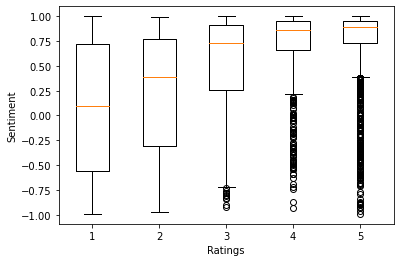

In [ ]:
##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

#draws a boxplot of the data
draw_box_plot(ratings_list, compound_scores_list)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Questions:
**From the box plot, what can you tell about the review sentiments and ratings? (What kind of properties can you identify)**

**Answer:**  
We can see that there are outliers for people who gave a rating of 3 or higher. These outliers are mostly towards the lower end of the sentiment range and the amount of them increases as the ratings get higher. This tells us that there were a of people who gave higher ratings, but the sentiments in their comments were lower than average. We can also see that the median sentiment for each rating increases as the ratings get higher. This is fitting since in theory people should have a more positive sentiment in their comments if they give a higher rating. We can also see that within the IQR, the median value is more towards the top of the IQR as the ratings get higher which also supports this theory. Another interesting thing to note is that the IQR gets smaller as the ratings get higher. This tells us that there is less variance in sentiment as the ratings increase. Comparing the IQR for ratings of 5 compared to that of ratings of 1, we can see that for ratings of 5, the IQR covers mostly positive sentiments whereas for ratings of 1, the IQR covers a wider range that also encompasses negative sentiments. In theory, this makes sense as people who give higher ratings, most will have more positive sentiments. Any negative sentiments will be very few which would make them outliers. These outliers can be explained with a multitude of reasons. We can also see a trend that the minimum sentiment values get farther and farther away from the Q1 values as the ratings get higher which also supports the theory that the sentiments are genrally more positive as the ratings get higher. Another thing to note is that the maximum values were the same for each rating, but the minimum value got higher as the ratings increased which also supports the theories stated.

### Repeat the same analysis for beer.csv and movie.csv separately.  
*For `beer.csv`, use `open("beer.csv", encoding="utf-8")` instead*  
*For movie, cast the review to the right type*

[14, 13, 14, 14, 11, 13, 13, 13, 12, 9]
[0.6901, 0.4019, 0.6808, 0.802, 0.65, 0.7906, 0.4019, 0.6808, 0.7248, 0.6739]
[[1.         0.51653668]
 [0.51653668 1.        ]]


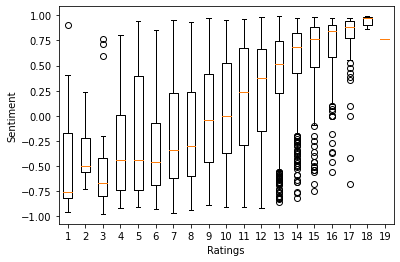

In [ ]:
# For beer

##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

# open csv file, and assign it to a handler
import csv
#For beer.csv, use open("beer.csv", encoding="utf-8") instead
with open("/content/drive/My Drive/COMM155_Project_2_Data/beer.csv", encoding="utf-8") as csvfile:

# create csv reader, and assign to an intermediate object
  csv_rd_obj = csv.reader(csvfile)

# cast the intermediate object to a list
  data = list(csv_rd_obj)

# close the csv file
  csvfile.close()

# extract comments and ratings
k = 0
ratings_list = []
compound_scores_list = []
#create sentiment classifier
sid = SentimentIntensityAnalyzer() 

for row in data:
    comments = row[0]
    ratings = row [1]
    compound_scores = sid.polarity_scores(comments)['compound']
# feed comments into classifier and save sentiment
    if k == 0:
      k += 1
    else:
      ratings_list.append(int(ratings))
      compound_scores_list.append(compound_scores)
      k += 1

print(ratings_list[:10])
print(compound_scores_list[:10])

#Print the correlation between ratings and classified sentiments
import numpy
print(numpy.corrcoef(ratings_list, compound_scores_list))

#Draw a box plot
draw_box_plot(ratings_list, compound_scores_list)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Questions:
**What is the correlation factor for the beer review dataset?**

**Answer:**  
0.51653668

### Questions:
**Compared to the previous box plot, what can you tell about the beer review sentiments and ratings? (Point out major differences)**

**Answer:**  
For this boxplot, there is a lot more variance thant the previous one on many factors. Starting with outliers, we can see for this boxplot there are outliers that record negative sentiments for the higher ratings like the previous boxplot, but for the beer data, we can also see that there are positive outliers for ratings of 1 and 3. However, there are fewer positive outliers than there are negative outliers. We can also see that most of the outliers are towards the higher ratings for amazon, but for beer, it looks more even with perhaps more outliers at rating 14 compared to rating 16 and 17. For the most part, the median sentiment for each rating increases like the previous boxplot, with a few stray medians like the ones at rating 2 and 19. This again tells us that as the ratings get higher, so does the sentiment of the comments. Unlike the boxplot for amazon which grew smaller as the ratings increased, for beer, the IQRs seem to vary from ratings 1 to 7, remain about the same (in terms of the size of the box, not the actual values) from ratings 7 to 11, and then become smaller from ratings 11 on up. Since the ratings are on a wider scale, this can explain why there is a lot of variance in sentiment for many of the ratings. Another major difference between the beer and amazon boxplots are the minimum and maximum values. For some of the ratings, mostly the lower ratings, the minimum value is closer to the IQR. As the ratings increase, we can see that the minimum and maximum values are more equally distanced, and then towards the higher ratings, the maximum value is closer to the IQR. Within the IQR, we can also see a similar trend with the median values where the median is closer to the bottom of the IQR or closer to the Q1 value at the lower ratings, moves closer to the middle, and then gets closer to the Q3 value at the higher ratings. For the minimum and maximum values themselves, unlike the amazon boxplot the maximum values are all different for the beer data. For the lower ratings we can see the maximum values are a lot lower and have more variance, and then they become about the same value from ratings of 7 on up. The minimum values are also different in that they increase in value in the higher ratings, but for most of the ratings, the minimum values are relatively similar. 

['5.0', '5.0', '4.0', '5.0', '5.0', '5.0', '1.0', '4.0', '3.0', '5.0']
[0.9933, 0.9442, 0.9905, 0.8763, 0.9729, 0.6705, -0.9653, 0.7579, 0.9891, 0.9528]
[[1.         0.39781475]
 [0.39781475 1.        ]]


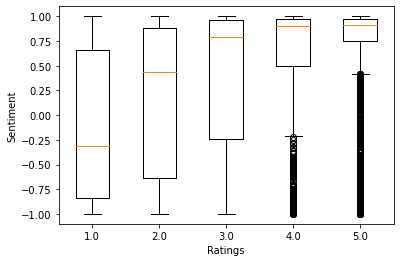

In [ ]:
# For movie

##############################################################################
# TODO: Your coding below                                                    #
##############################################################################

# open csv file, and assign it to a handler
import csv
with open("/content/drive/My Drive/COMM155_Project_2_Data/movie.csv", encoding="utf-8") as csvfile:

# create csv reader, and assign to an intermediate object
  csv_rd_obj = csv.reader(csvfile)

# cast the intermediate object to a list
  data = list(csv_rd_obj)

# close the csv file
  csvfile.close()

# extract comments and ratings
k = 0
ratings_list = []
compound_scores_list = []
#create sentiment classifier
sid = SentimentIntensityAnalyzer() 

for row in data:
    comments = row[0]
    ratings = row [1]
    compound_scores = sid.polarity_scores(comments)['compound']
# feed comments into classifier and save sentiment
    if k == 0:
      k += 1
    else:
      #we have to cast review to the right type, so we can't use int for the ratings like we did before
      #since the movie data set deals with 1.0, 2.0, 3.0 etc. rather than 1, 2, 3 etc. for the ratings
      ratings_list.append(ratings)
      compound_scores_list.append(compound_scores)
      k += 1

print(ratings_list[:10])
print(compound_scores_list[:10])

#Print the correlation between ratings and classified sentiments
import numpy as np
#this code helps solve the issue of dealing with 1.0, 2.0, 3.0 etc. for the ratings in this data set
print(np.corrcoef(np.array(ratings_list).astype(np.float), np.array(compound_scores_list).astype(np.float)))

#Draw a box plot
draw_box_plot(ratings_list, compound_scores_list)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Questions:
**What is the correlation factor for the movie review dataset?**

**Answer:**  
0.39781475

### Questions:
**Point out major differences (if any) between the box plot for movie review dataset when compared with (a) amazon, (b) beer review dataset**

**Answer:**  
For the movie boxplot, it is most similar to the amazon boxplot with all the trends and properties that can be seen. There are differences to point out when comparing the movie boxplot to both the amazon and the beer boxplots.

When comparing the movie boxplot to the amazon boxplot, we can see that there are negative outliers towards the higher ratings for both. However, for movie the outliers are for ratings of 4 and 5 rather than for ratings of 3 as well. The outlier range for rating 5 for both amazon and movie are similar, but for rating 4 the outliers have a wider range for amazon. The median values increase as the rating increases for both, but the increase for movie is not as linear as it is for amazon. For amazon, the median value is usually in the middle of the IQR or towards the top, but we can see that for movie, that trend does not apply since for rating 1.0, the median value is towards the bottom of the IQR range. For both amazon and movie, the IQR range does decrease, but not at the same rate. In fact, the IQR between the ratings of 1.0 and 2.0 in movie seem about the same before they start decreasing. The minimum and maximum values are different as well. For amazon, we noted that the maximum value gets closer to the Q3 value as the ratings get higher but for movie, that is not the case since we can see that the minimum value is very close to the Q1 value at rating 1.0. Like the amazon boxplot, the maximum values are relatively similar. For ht eminimum values of movie, they are similar for ratings of 1 to 3 before increasing in value whereas for amazon, the minimum values start increasing after rating 2.


When comparing the movie boxplot to the beer boxplot, there are outliers at more rating values in the beer boxplot than the movie boxplot. The movie boxplot also has all negative outliers and no positive outliers like the beer boxplot does. The movie boxplot also has more outliers at higher ratings while the beer boxplot seems to habe more outliers at rating 14 compared to 16 and 17. The median value increases for both, but it is more varied for beer than it is for movie. We can see that the median values for beer at rating 1 to 4 are varied, relatively the same form 4 to 8, and then increase. For movie, the median value increases without variance in that trend. Most of the median values in movie are closer to the top of the IQR except for the value at rating 1. For beer, we can see more variance where the median values are closer to the bottom of the IQR at the lower ratings, move towards the center of the IQR, and then get closer to the top of the IQR at the higher ratings. There is also a lot more variance in the width of the IQR for beer compared to movie. For movie, the IQR gets smaller as the ratings increase but for beer, the lower ratings also have smaller IQR so this trend does not apply. In terms of minimum and maximum values, for movie, the IQR is closer to the maximum value with the exception at rating 1. For beer, the IQR is closer to the minimum value at the lower ratings, becomes more even between the minimum and maximum values, and then gets closer to the maximum value as the rating increases. We can also see that the maximum values themselves stay relatively the same throughout the ratings for movie, but are more varied for beer until at rating 7 on up. The minimum values for movie increase as the ratings increase, but for beer they are relatively similar for ratings 3 to 12 and vary at the other ratings.

# Bonus Question

[[1.         0.41715484]
 [0.41715484 1.        ]]
[[1.         0.51653668]
 [0.51653668 1.        ]]
[[1.         0.39781475]
 [0.39781475 1.        ]]


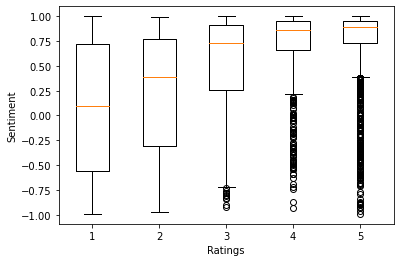

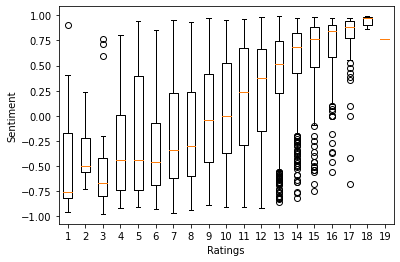

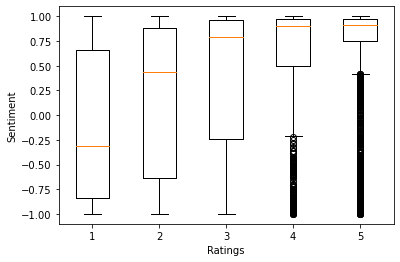

In [47]:
# Complete the following function and check if it is working for all the three datasets.
# Check project 2 pdf for more details
# ** Comment the function heavily describing what you are exactly doing **

def sentiment_analysis(x):
    ##############################################################################
    # TODO: Your coding below                                                    #
    ##############################################################################

  # open csv file, and assign it to a handler
  import csv
  with open("/content/drive/My Drive/COMM155_Project_2_Data/" + x, encoding="utf-8") as csvfile:

  # create csv reader, and assign to an intermediate object
    csv_rd_obj = csv.reader(csvfile)

  # cast the intermediate object to a list
    data = list(csv_rd_obj)

  # close the csv file
    csvfile.close()

  # extract comments and ratings
  k = 0
  ratings_list = []
  compound_scores_list = []
  #create sentiment classifier
  sid = SentimentIntensityAnalyzer() 

  for row in data:
      comments = row[0]
      ratings = row[1]
      compound_scores = sid.polarity_scores(comments)['compound']
  # feed comments into classifier and save sentiment
      if k == 0:
        k += 1
      else:
        #this part of the code helps solve the issue of 1, 2, 3 vs. 1.0, 2.0, 3.0 since the data sets have different number formats for the ratings
        ratings_list.append(int(float(ratings))) 
        compound_scores_list.append(compound_scores)
        k += 1

  #Since we don't have to print these out like the other problems, I made them comments to keep them as a reference.
  #print(ratings_list[:10])
  #print(compound_scores_list[:10])

  #Print the correlation between ratings and classified sentiments
  import numpy as np
  print(np.corrcoef(np.array(ratings_list).astype(np.float), np.array(compound_scores_list).astype(np.float)))

  #Draw a box plot
  draw_box_plot(ratings_list, compound_scores_list)

#using the fuction for the three data sets
sentiment_analysis("amazon.csv")
sentiment_analysis("beer.csv")
sentiment_analysis("movie.csv")


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

### Submission Instructions:
This .ipynb file with problems completed to be submitted on CCLE before the due date. File name should be your UID. For example: `123456789.ipynb`.

To download the `.ipynb` file from Colab, go to **File->Download .ipynb**

Please double check uploaded format by downloading your uploaded file. Any other file format will not be accepted.